In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")

In [70]:
df = pd.read_csv("bike_day.csv")

In [71]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [72]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [73]:
updated_df = df["dteday"].astype('datetime64[ns]')

In [74]:
 df["dteday"] = updated_df

In [75]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


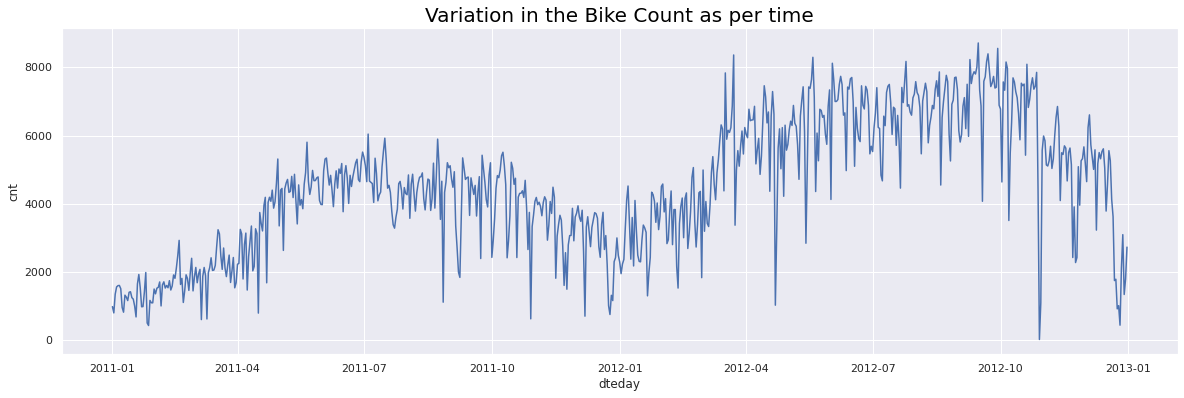

In [76]:
sns.set()
plt.figure(figsize = (20,6))
plt.title("Variation in the Bike Count as per time", fontdict={'fontsize':20, 'color': 'black'})
sns.lineplot(x="dteday", y ="cnt", data = df)
plt.show()

In [77]:
df.isna().sum ()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [78]:
df.shape

(731, 16)

In [79]:
df.instant.nunique()

731

In [80]:
df.drop(columns  = "instant", inplace =True)

In [81]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


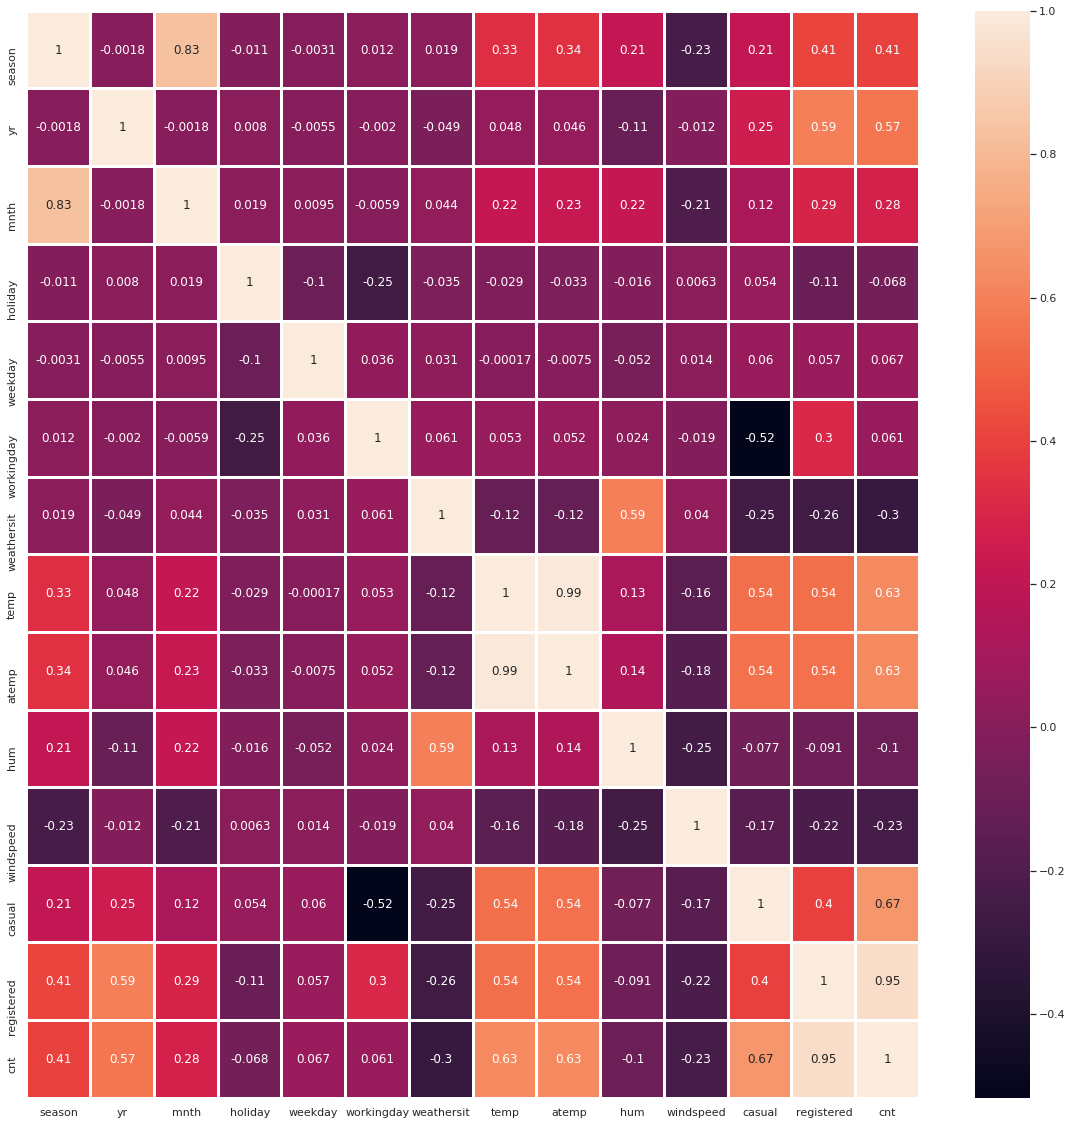

In [82]:
# Finding the Correlation matrix 
sns.set()
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot= True, linewidths=2)
plt.show()

In [83]:
# All columns have quite a good correlation in between them
correlation_df = df.corr()["cnt"].reset_index().rename(columns = {"index":"column", "cnt":"corr_value"})

In [84]:
correlation_df.sort_values(by="corr_value", ascending = False )

,column,corr_value
13,cnt,1.000000
12,registered,0.945517
11,casual,0.672804
8,atemp,0.631066
7,temp,0.627494
1,yr,0.566710
0,season,0.406100
2,mnth,0.279977
4,weekday,0.067443
5,workingday,0.061156


In [85]:
temp = [i for i in range(0,731)]

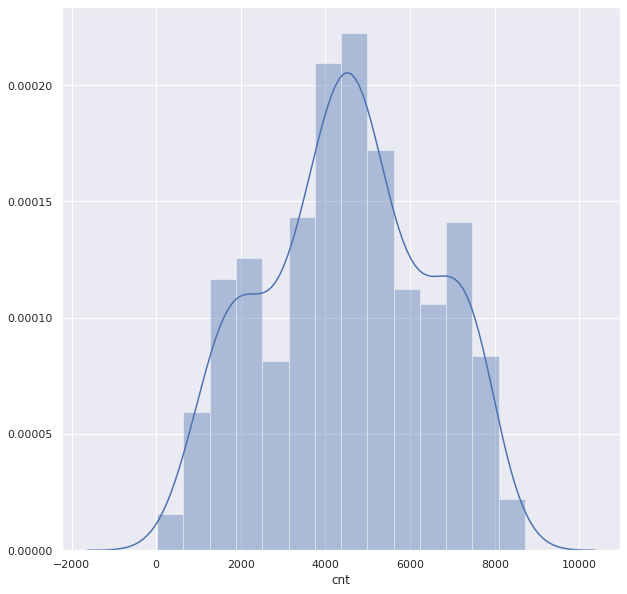

In [86]:
sns.set()
plt.figure(figsize = (10,10))
sns.distplot(df.cnt)
plt.show()

In [87]:
sample = dict({})
for i,j  in zip(correlation_df["column"], correlation_df["corr_value"]):
  if abs(j) >= 0.50:
    sample.update({i:j})

final_col = list(sample.keys())[:-1]

In [88]:
# Splitting Dataset
X = df[final_col]
y = df["cnt"]

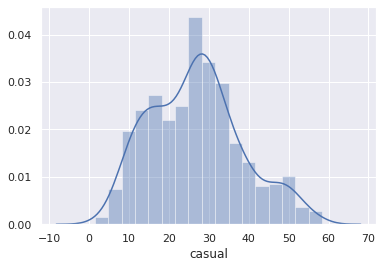

In [95]:
X["casual"] = np.sqrt(X["casual"])
sns.distplot(logged_val)
plt.show()

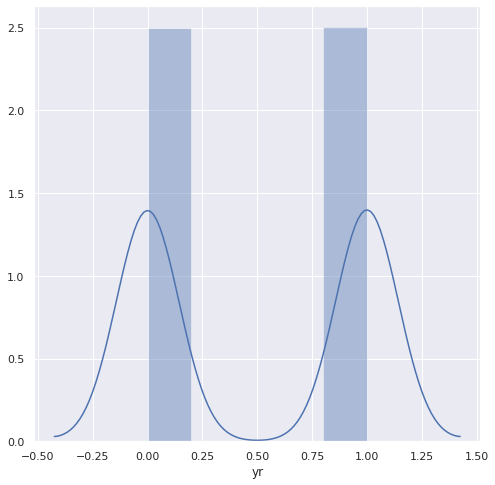

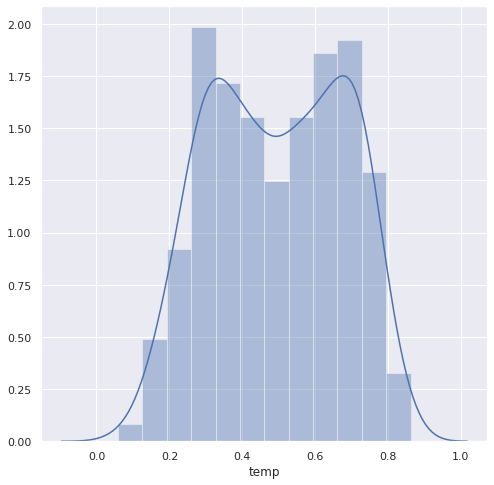

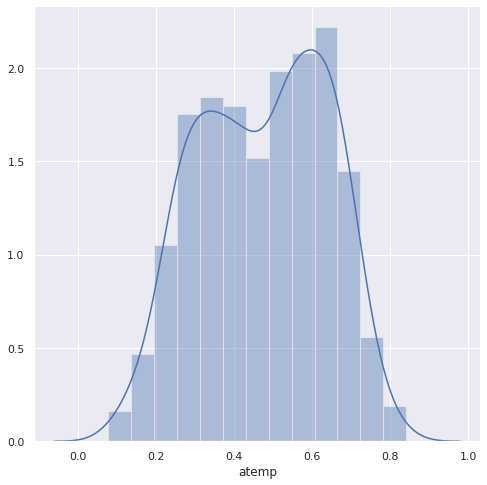

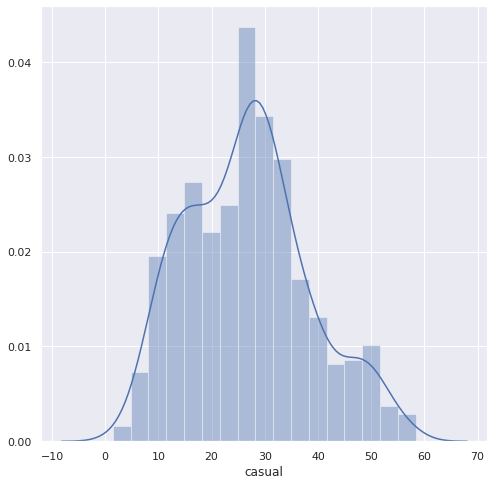

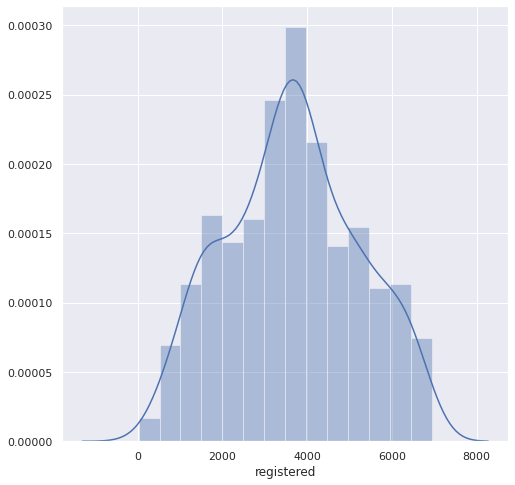

In [96]:
for i in X.columns.to_list():
  sns.set()
  plt.figure(figsize = (8,8))
  sns.distplot(X[i])
  plt.show()

In [97]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 42)

In [100]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

In [101]:
X_test_scale = scaler.transform(X_test)

In [102]:
# Fitting the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scale, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
y_pred = lr.predict(X_test_scale)

In [104]:
# Evaluating the Simple Linear Regression
from sklearn.metrics import r2_score, mean_absolute_error

In [105]:
print("R2 score is", round(r2_score(y_test, y_pred), 2))

R2 score is 1.0


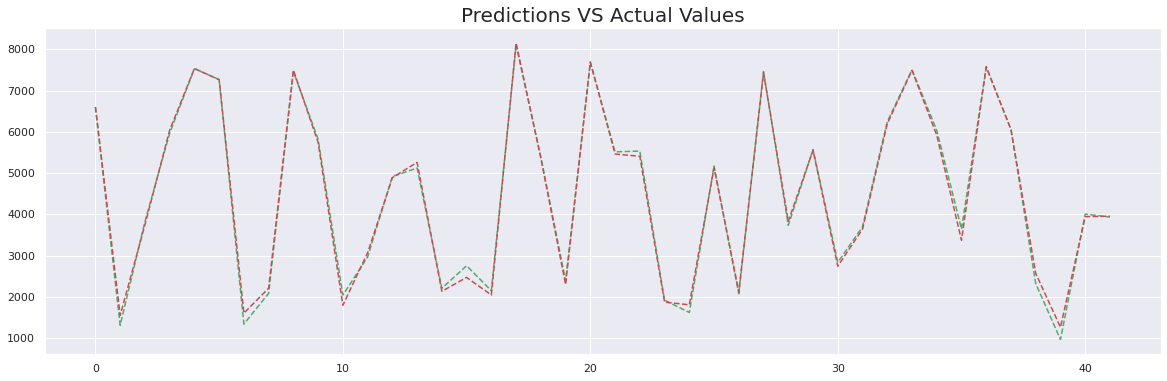

In [109]:
temp = [i for i in range(0,42)]
sns.set()
plt.figure(figsize =(20,6))
plt.title("Predictions VS Actual Values", fontdict= {'fontsize': 20})
plt.plot(temp, y_pred, "--g")
plt.plot(temp, y_test, "--r")
plt.show()